# Comparing two PyWGCNAs
you can also compare to pyWGCNA object to find out how each group of cluster is correlation with each others.
For achieving that, first you need to read your PyWGCNa object by `readWGCNA()` function.

## Read two PyWGCNA objects

In [1]:
import PyWGCNA
pyWGCNA_5xFAD = PyWGCNA.readWGCNA("5xFAD.p")
pyWGCNA_3xTgAD = PyWGCNA.readWGCNA("3xTgAD_paper/3xTgAD.p")

Reading WGCNA done!
Reading WGCNA done!


## Comparing two PyWGCNA objects
After reading the object you only need to call `compareWGCNA()` function on your two PyWGCNA, you can find the comparison results as a table in `comparison` variable.

In [2]:
modelAD_5xFAD_3xTgAD = PyWGCNA.compareWGCNA(pyWGCNA_5xFAD, 
                                           pyWGCNA_3xTgAD)
modelAD_5xFAD_3xTgAD.comparison

,5xFAD,3xTgAD,5xFAD_size,3xTgAD_size,number,fraction(%),P_value
0,black,black,6746,8157,2497,30.611745,0.0
1,black,brown,6746,113,24,21.238938,0.168742
2,black,darkgray,6746,507,40,7.889546,0.0
3,black,darkgrey,6746,479,44,9.185804,0.0
4,black,darkred,6746,76,54,71.052632,0.0
...,...,...,...,...,...,...,...
685,whitesmoke,salmon,613,63,2,3.174603,0.670583
686,whitesmoke,silver,613,431,4,0.928074,0.039735
687,whitesmoke,snow,613,156,1,0.641026,0.192283
688,whitesmoke,white,613,162,1,0.617284,0.19613


## Ploting comparison
You can also plot the comparison result as a confusion matrix by using `plotCompareWGCA()` function.

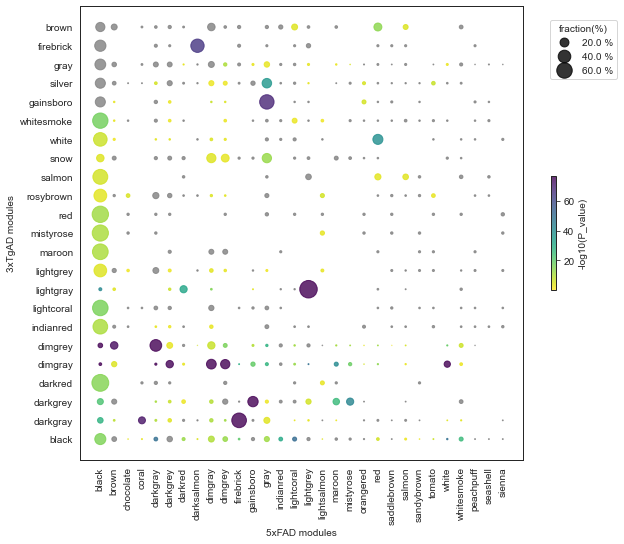

In [2]:
modelAD_5xFAD_3xTgAD.plotCompareWGCA(save=True, order1=None, order2=None)

In [4]:
modelAD_5xFAD_3xTgAD.saveComparison()

Saving comparison as comparison.p


In [1]:
import PyWGCNA
modelAD_5xFAD_3xTgAD = PyWGCNA.readComparison('comparison.p')

Reading comparison done!
